In [ ]:
!pip install wordcloud
!pip install nltk



🎬 Analisi per il genere Drama...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\tomma\AppData\Local\Temp\ipykernel_13844\1783098984.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[rating], y=[genre], palette=['gold'], width=0.4, ax=ax)


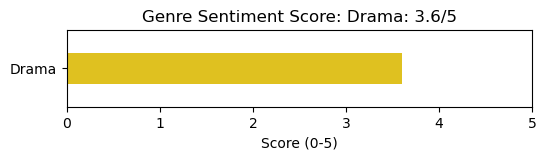

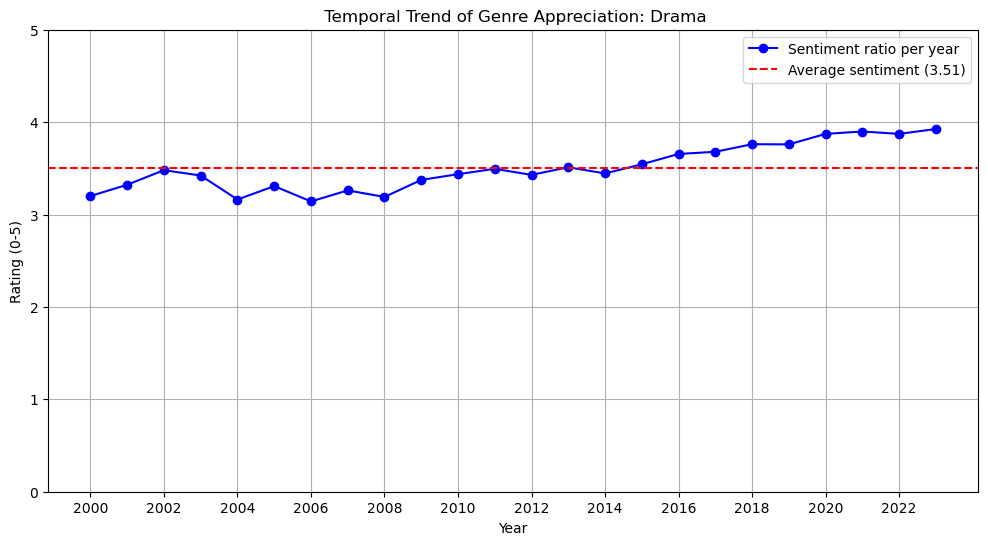

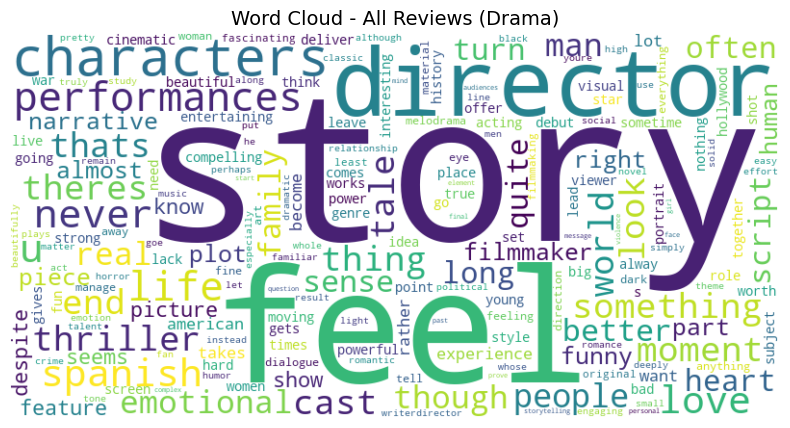

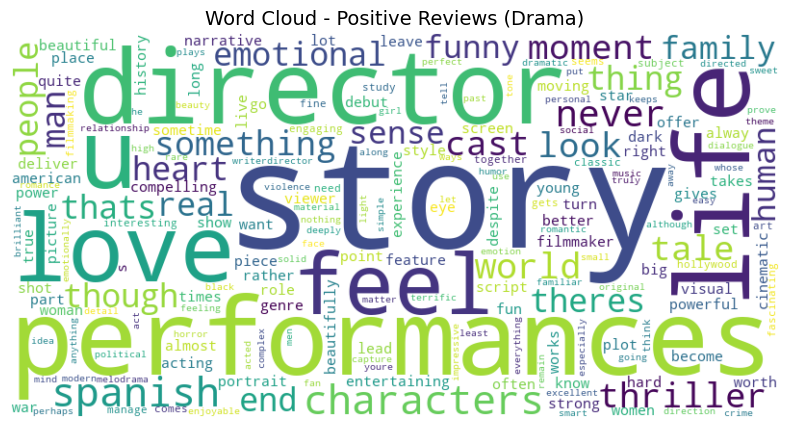

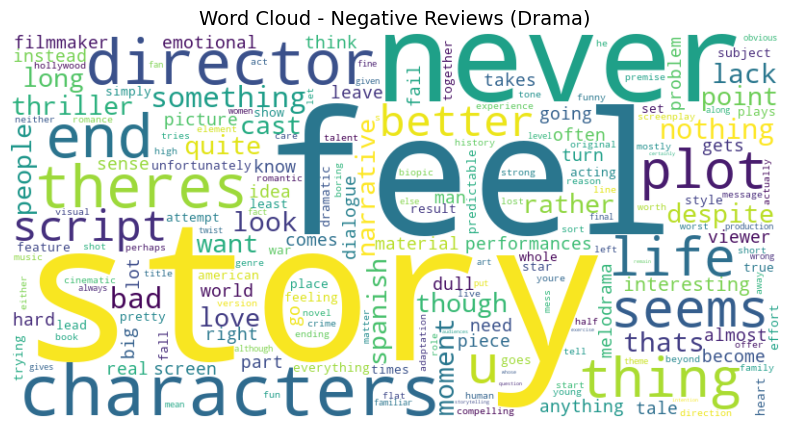


🎬 Analisi per il genere Action...


C:\Users\tomma\AppData\Local\Temp\ipykernel_13844\1783098984.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[rating], y=[genre], palette=['gold'], width=0.4, ax=ax)


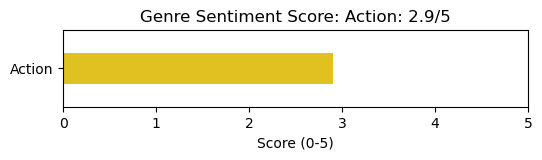

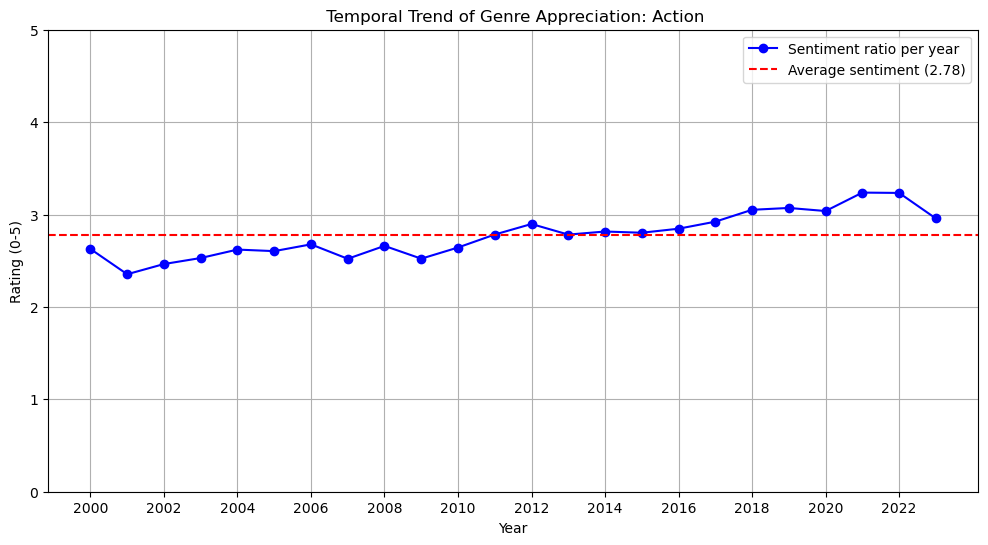

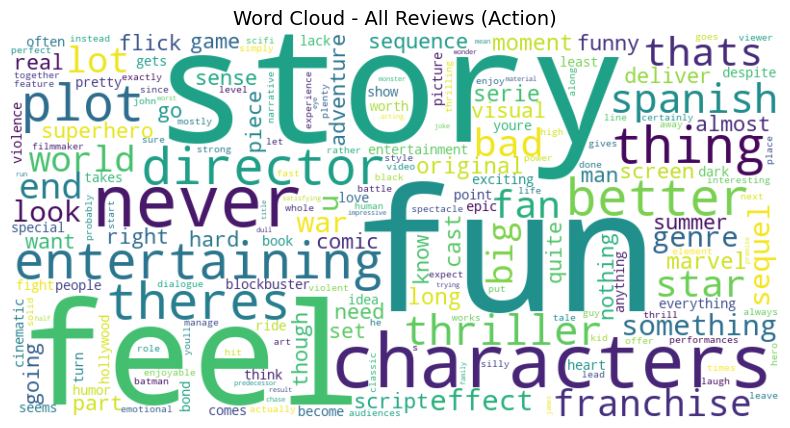

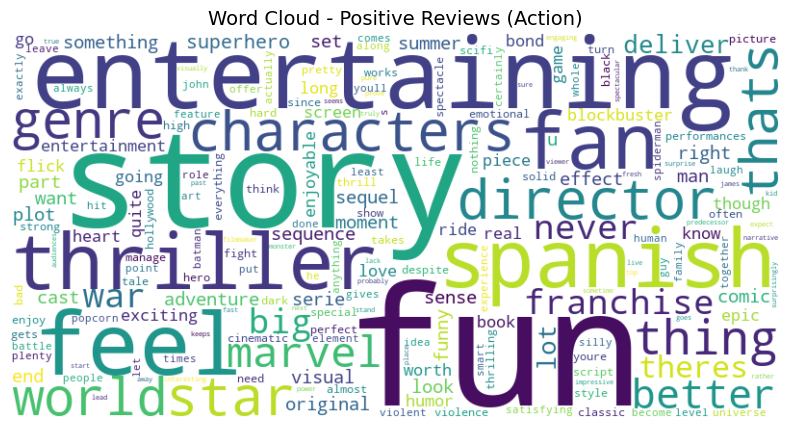

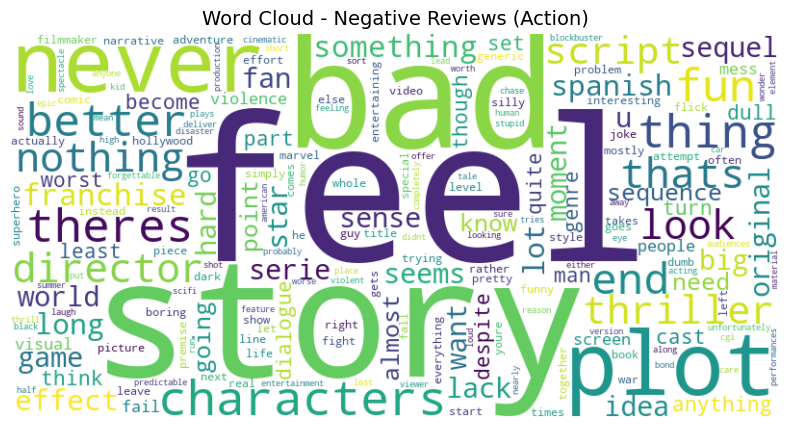


🎬 Analisi per il genere Comedy...


C:\Users\tomma\AppData\Local\Temp\ipykernel_13844\1783098984.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[rating], y=[genre], palette=['gold'], width=0.4, ax=ax)


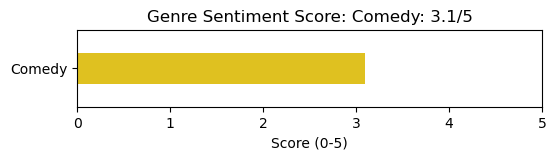

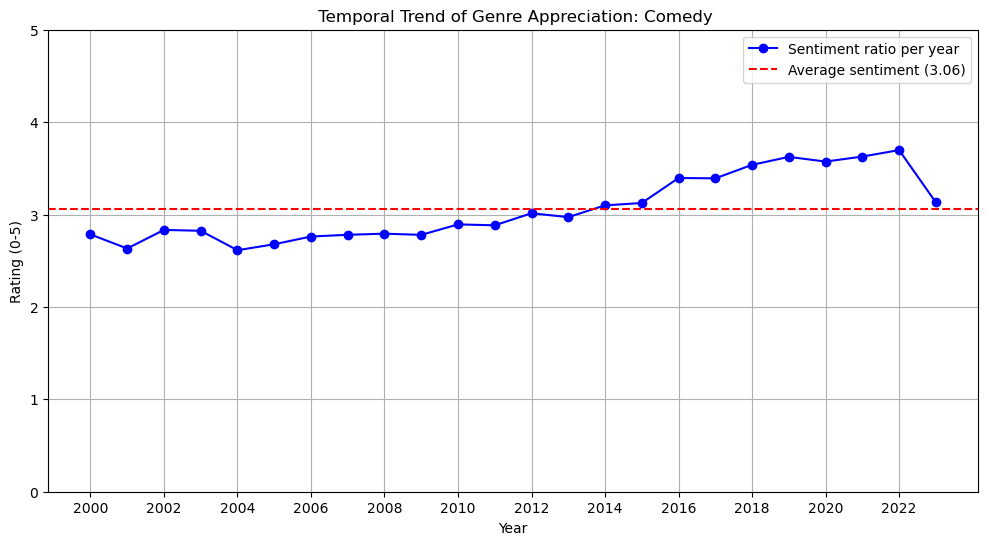

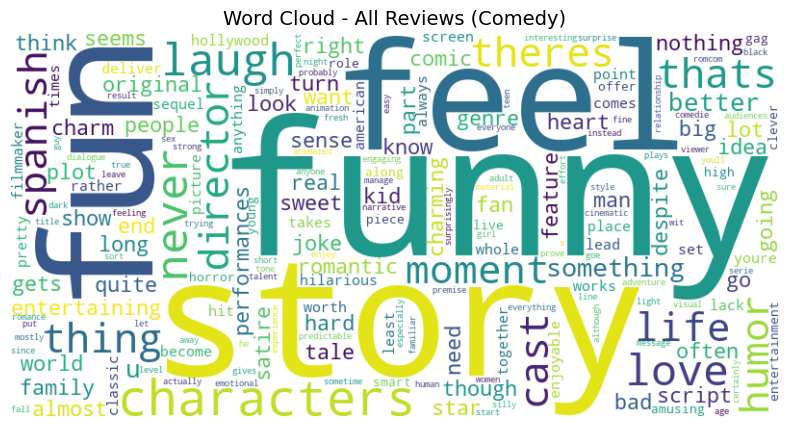

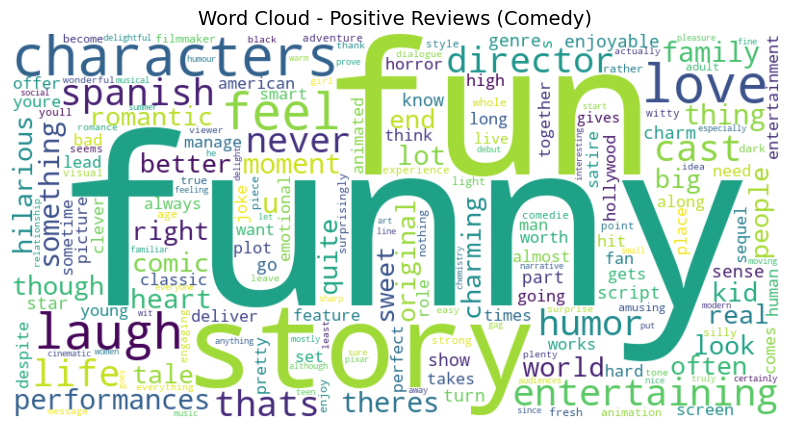

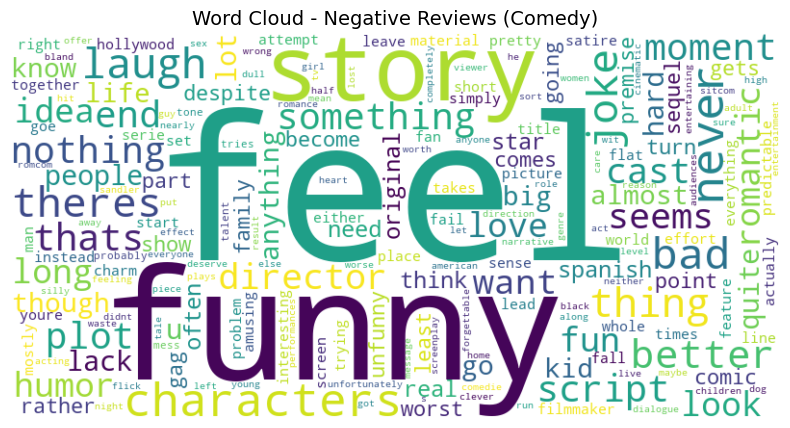

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import numpy as np
import os


nltk.download('stopwords')


custom_stopwords = set([
    "film", "movie", "movies",  "character", 
     "performance", "scene", "scenes", 
    "cinema", "audience", "actor", "actors", "review", "reviews",
    "watch", "watching", "seen", "time", "storyline",
    "doesn't", "isn't", "wasn't", "weren't", "it's", "they're", "i'm", "action", "comedy", "drama",
    "make", "one", "films", "good", "great", "well", "really", "much", "many", "even", "ever", "best",
    "full", "doesnt", "isnt", "wasnt", "werent", "its", "theyre", "im", "dont", "cant", "wont", "shouldnt",
    "little", "might", "every", "seem", "get", "see", "kind", "say", "play",
    "enough", "bring", "come", "made", "de", "may", "there", "would",
    "also", "yet", "makes", "another", "that", "keep", "still", "far", "less", "give", 
    "making", "bit", "like", "could", "ultimately", "around", "without", "take", "back", "find", "finds", "work", "way", 
    "new", "old", "first", "last", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "zero", "year", "years", "month", "months", "day", "days", "week", "weeks", "hour", "hours", "minute", "minutes", "second", "seconds", "today", "tomorrow", "yesterday", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec", "jan.", "feb.", "mar.", "apr.", "may.", "jun.", "jul.", "aug.", "sep.", "oct.", "nov.", "dec.", "january.", "february.", "march.", "april.", "may.", "june.", "july.", "august.", "september.", "october.", "november.", "december.",
])


def clean_text(text):
    stop_words = set(stopwords.words('english'))  
    stop_words.update(custom_stopwords)  
    
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    return words  

def calculate_rating(df):
    total_reviews = len(df)
    positive_reviews = len(df[df['scoreSentiment'] == 'POSITIVE'])
    positive_percentage = (positive_reviews / total_reviews) * 100
    return round((positive_percentage / 100) * 5, 1)  # Scala 0-5

def save_plot(fig, genre, name, show=False):
    directory = f"Grafici/{genre}"
    os.makedirs(directory, exist_ok=True)
    fig.savefig(f"{directory}/{name}.png", bbox_inches='tight')
    if show:
        plt.show()
    plt.close(fig)

def plot_rating(rating, genre, show=True):
    fig, ax = plt.subplots(figsize=(6,1))
    sns.barplot(x=[rating], y=[genre], palette=['gold'], width=0.4, ax=ax)
    ax.set_xlim(0, 5)
    ax.set_xlabel("Score (0-5)")
    ax.set_title(f"Genre Sentiment Score: {genre}: {rating}/5")
    save_plot(fig, genre, "Sentiment", show)

def generate_wordcloud(text, title, genre, filename, show=True):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white', colormap='viridis',
        collocations=False,  
        stopwords=custom_stopwords  
    ).generate(' '.join(text))
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)
    save_plot(fig, genre, filename, show)

def plot_trend(df, genre, show=True):
    df['year'] = df['creationDate'].dt.year
    df_yearly = df.groupby('year')['scoreSentiment'].agg(['count', lambda x: (x == 'POSITIVE').mean() * 5])
    df_yearly = df_yearly.rename(columns={'count': 'total_reviews', '<lambda_0>': 'rating'})
    df_yearly_filtered = df_yearly[df_yearly['total_reviews'] >= 1000]
    average_rating = df_yearly_filtered['rating'].mean()
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df_yearly_filtered.index, df_yearly_filtered['rating'], marker='o', linestyle='-', label="Sentiment ratio per year", color="blue")
    ax.axhline(y=average_rating, color='red', linestyle='--', label=f"Average sentiment ({average_rating:.2f})")
    ax.set_xlabel("Year")
    ax.set_ylabel("Rating (0-5)")
    ax.set_title(f" Temporal Trend of Genre Appreciation: {genre}")
    ax.set_ylim(0, 5)
    ax.set_xticks(np.arange(df_yearly_filtered.index.min(), df_yearly_filtered.index.max()+1, step=2))
    ax.legend()
    ax.grid(True)
    save_plot(fig, genre, "trend", show)

def analyze_genre(file_path, genre, show=True):
    print(f"\n🎬 Analisi per il genere {genre}...")
    df = pd.read_csv(file_path)
    df['creationDate'] = pd.to_datetime(df['creationDate'])
    df['cleaned_review'] = df['reviewText'].apply(clean_text)
    rating = calculate_rating(df)
    plot_rating(rating, genre, show)
    plot_trend(df, genre, show)
    
    # Word Cloud
    all_words = [word for review in df['cleaned_review'] for word in review]
    generate_wordcloud(all_words, f"Word Cloud - All Reviews ({genre})", genre, "wordcloud_all", show)
    
    df_positive = df[df['scoreSentiment'] == 'POSITIVE']
    df_negative = df[df['scoreSentiment'] == 'NEGATIVE']
    
    if not df_positive.empty:
        positive_words = [word for review in df_positive['cleaned_review'] for word in review]
        generate_wordcloud(positive_words, f"Word Cloud - Positive Reviews ({genre})", genre, "wordcloud_positive", show)
    
    if not df_negative.empty:
        negative_words = [word for review in df_negative['cleaned_review'] for word in review]
        generate_wordcloud(negative_words, f"Word Cloud - Negative Reviews ({genre})", genre, "wordcloud_negative", show)

analyze_genre('Review/Final/reviews_Drama.csv', 'Drama')
analyze_genre('Review/Final/reviews_Action.csv', 'Action')
analyze_genre('Review/Final/reviews_Comedy.csv', 'Comedy')
